<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:** A neuron is a function from a vector space to a scalar. It sums its inputs(features) and applies an activation function, such as the sigmoid or relu function, and normalizes it.
- **Input Layer:** The input layer == the num of features you will be using. Its where you send your observations to then be passed on to the hidden layer.
- **Hidden Layer:** In the hidden layer, artificial neurons take in weighted inputs and produce an output through an activation function.
- **Output Layer:** The output layer is the prediction vector. 
- **Activation Function:** Activation functions can normalize values to probabilities or clip them to probability--examples are sigmoid and relu, among others.

Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

# Your Answer Here - Change the Cell to Markdown

- **Backpropagation:** Since, hypothetically, im explaing it to a five year old: Backpropagation is a handy trick that helps my computer brain to continue to learn from it mistakes--many times in the hope that it will become better and better. Basically, just before it gives me an answer it goes 'WAIT, I got something better. give me a sec', until it-- for reasons I dont know yet, finds its final answer.

Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

# Your Answer Here - Change the Cell to Markdown
- **inputs to ouput:** You begin with giving your input layer--the initial step, observations. The size of the input layer is equal to the the number of observations(features) each instance has. From the input layer the values of each input node is passed to each node of the hidden layer. In the hidden layer the nodes take in the weighted inputs and then normalized in the activation function. Finally, the output layer behaves similar to the hidden layer but commonly the activation function is different depending on whether the target is a regression problem or classification--also, if its a binary classification or multiclass classification. 

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [25]:
# imports 
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [402]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [151]:
xx.shape, yy.shape

((50, 50), (50, 50))

In [152]:
X.shape, y.shape

((300, 2), (300,))

### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [324]:
# simple perceptron model
model1 = Sequential()
model1.add(Dense(1, input_dim=2, activation='relu')) # 1 dense layer with single neuron
model1.add(Dense(1, activation='sigmoid')) # sigmoid activation function
model1.summary()

Model: "sequential_590"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3699 (Dense)           (None, 1)                 3         
_________________________________________________________________
dense_3700 (Dense)           (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [325]:
# compile
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [326]:
# fit model
h1 = model1.fit(X, y, epochs=100, verbose=False)

In [327]:
# eval model1
model1.evaluate(X, y)

300/300 [==============================] - 0s 393us/sample - loss: 0.5900 - accuracy: 0.6800


[0.5899966557820638, 0.68]

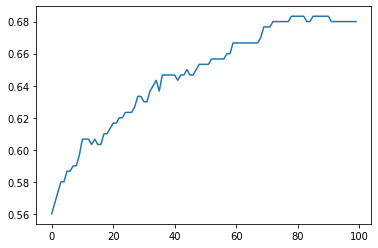

In [328]:
# plotting the accuracy. 
plt.plot(h1.history['accuracy'])

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. 

In [403]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [429]:
model2 = Sequential()

model2.add(Dense(1, input_dim=2, activation='relu'))
model2.add(Dense(12, activation='relu')),
#model2.add(Dense(32, activation='relu')),
model2.add(Dense(32, activation='tanh'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_612"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3790 (Dense)           (None, 1)                 3         
_________________________________________________________________
dense_3791 (Dense)           (None, 12)                24        
_________________________________________________________________
dense_3792 (Dense)           (None, 32)                416       
_________________________________________________________________
dense_3793 (Dense)           (None, 1)                 33        
Total params: 476
Trainable params: 476
Non-trainable params: 0
_________________________________________________________________


In [430]:
from tensorflow.keras.callbacks import EarlyStopping 

stop = EarlyStopping(monitor='accuracy', min_delta=.02, patience=2)

In [431]:
h2 = model2.fit(X, y, epochs=100, callbacks=[stop])

Train on 300 samples
Epoch 1/100
300/300 [==============================] - 0s 2ms/sample - loss: 0.6553 - accuracy: 0.5533
Epoch 2/100
300/300 [==============================] - 0s 119us/sample - loss: 0.6421 - accuracy: 0.5900
Epoch 3/100
300/300 [==============================] - 0s 109us/sample - loss: 0.6315 - accuracy: 0.6233
Epoch 4/100
300/300 [==============================] - 0s 106us/sample - loss: 0.6239 - accuracy: 0.6433
Epoch 5/100
300/300 [==============================] - 0s 116us/sample - loss: 0.6169 - accuracy: 0.6500
Epoch 6/100
300/300 [==============================] - 0s 109us/sample - loss: 0.6107 - accuracy: 0.6600
Epoch 7/100
300/300 [==============================] - 0s 120us/sample - loss: 0.6057 - accuracy: 0.6533


In [432]:
model2.evaluate(X, y)

300/300 [==============================] - 0s 437us/sample - loss: 0.6037 - accuracy: 0.6567


[0.6037402717272441, 0.6566667]

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [77]:
!pip install mlxtend

     |████████████████████████████████| 1.3MB 1.8MB/s eta 0:00:01


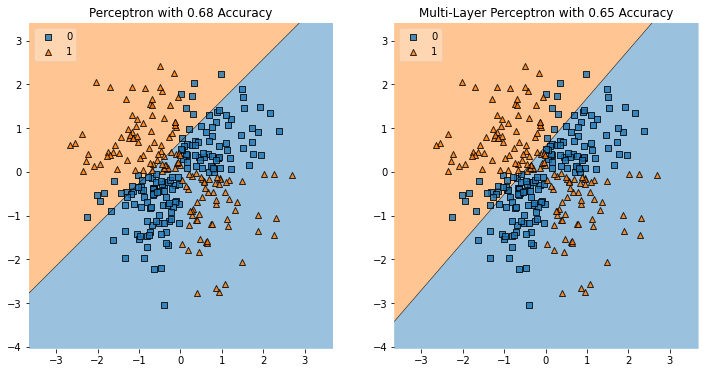

In [433]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

# Thoughts on multiple iterations between the simple and multi-layer perceptron

There is evidently randomness(rng) in the data-- i realized everytime i ran the dataset code it changed. Even when I dont, it still gets random results when fitting the data to the model--not too mention param tuning. I did at one point get above 70% but i made the mistake of running it again out of hope of getting a better score.   

As for what the architectural property of the multi-layer perceptron is that allows for more accuracy in learning the relationship between X and y is the fact that multiple perceptron team up, stacked in several layers to solve the complex problem.

This would be more useful due to the fact that it is more configurable and powerful with large datasets. Can better find connections that a simple perceptron just cant.

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [125]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3,0
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1


In [112]:
# Your Code Here
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [115]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [119]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [126]:
# wrangle data 
def wrangle(data):
    # make some assertions
    assert data.isna().sum().sum() == 0
    assert all([t.name in ['int64', 'float64'] for t in data.dtypes])
    print(data.shape)
    scaler = StandardScaler().fit_transform(data.drop('target', axis=1))
    
    return (pd.DataFrame(data=scaler, columns=data.drop('target', axis=1).columns),
            data.target)

X, y = wrangle(df)

X.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.731619,0.681005,-0.938515,-0.663867,0.265454,-0.417635,0.898962,-0.421862,1.435481,2.208842,-0.649113,0.265082,1.123029
1,-1.363869,0.681005,0.032031,-0.663867,0.941846,-0.417635,0.898962,0.540209,-0.696631,-0.896862,0.976352,-0.714429,-0.512922
2,0.952197,-1.468418,-0.938515,-0.435415,-0.952051,-0.417635,0.898962,-0.596784,1.435481,-0.896862,-0.649113,-0.714429,-0.512922
3,0.290464,-1.468418,-0.938515,-0.206964,1.096450,-0.417635,-1.005832,0.409017,-0.696631,-0.896862,0.976352,0.265082,-0.512922
4,0.511041,0.681005,1.002577,1.049520,-0.662169,2.394438,0.898962,0.321556,-0.696631,0.483451,0.976352,-0.714429,-0.512922


In [134]:
# Import Hyperparameters
inputs = X.shape[1]
epochs = 22
batch_size = 16

def create_model(optimizer, layers_topo, loss): 
    
    # Create Model
    model = Sequential()
    model.add(Dense(inputs, activation='sigmoid', input_shape=(inputs,)))
    for k in layers_topo: 
        model.add(Dense(k, activation='relu'))
        model.add(Dense(k, activation='relu'))
        model.add(Dense(k, activation='sigmoid'))
    model.add(Dense(1))
    # Compile Model
    model.compile(optimizer=optimizer, metrics=['accuracy'], loss=loss)
    
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

# hyper param for tuning
batch_size = [64, 128]
epochs = [256]
losses = ['binary_crossentropy', 'mse']
optimizers = ['adam', 'SGD']
layering = [[64,32,64], [32,64,32]]

param_grid = dict(batch_size=batch_size, epochs=epochs, loss=losses, optimizer=optimizers, layers_topo=layering)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, iid=False, verbose=0)

grid_result = grid.fit(X, y) # I have no clue what that error is telling me. Will try a different method

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x136ffa710>, as the constructor either does not set or modifies parameter layers_topo

# Method number 2

I could not resolve that error from the previous code and time was running out. This method takes much from our lectures! 

In [127]:
from sklearn.model_selection import train_test_split

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
np.random.seed(42)

# model
model = Sequential()

#hidden
model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dropout(.2))

#output
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                    optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_325"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1713 (Dense)           (None, 13)                182       
_________________________________________________________________
dropout (Dropout)            (None, 13)                0         
_________________________________________________________________
dense_1714 (Dense)           (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [129]:
results = model.fit(X_train, y_train, batch_size=16, epochs=50, validation_split=.15, verbose=1)
scores = model.evaluate(X_test, y_test)
print(f'Baseline {model.metrics_names[1]}: {scores[1]*100}')

Train on 205 samples, validate on 37 samples
Epoch 1/50
205/205 [==============================] - 1s 3ms/sample - loss: 0.8001 - accuracy: 0.5415 - val_loss: 0.6896 - val_accuracy: 0.5946
Epoch 2/50
205/205 [==============================] - 0s 296us/sample - loss: 0.7209 - accuracy: 0.6146 - val_loss: 0.6649 - val_accuracy: 0.6216
Epoch 3/50
205/205 [==============================] - 0s 244us/sample - loss: 0.7243 - accuracy: 0.5951 - val_loss: 0.6416 - val_accuracy: 0.5946
Epoch 4/50
205/205 [==============================] - 0s 262us/sample - loss: 0.6728 - accuracy: 0.6732 - val_loss: 0.6220 - val_accuracy: 0.6486
Epoch 5/50
205/205 [==============================] - 0s 256us/sample - loss: 0.6403 - accuracy: 0.6732 - val_loss: 0.6049 - val_accuracy: 0.6757
Epoch 6/50
205/205 [==============================] - 0s 248us/sample - loss: 0.6292 - accuracy: 0.6829 - val_loss: 0.5888 - val_accuracy: 0.6757
Epoch 7/50
205/205 [==============================] - 0s 225us/sample - loss: 0.5

In [130]:
# Function to create model, required for KerasClassifier
def create_model(activation):
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, activation=activation))
    model.add(Dropout(.2))
    model.add(Dense(1, activation='sigmoid'))
    

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=1)

# define the grid search parameters
param_grid = {'activation': ['relu', 'sigmoid'],
              'batch_size': [10, 50, 100],
              'epochs': [100]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

grid_result.score(X_test, y_test)

Train on 161 samples
Epoch 1/100
161/161 [==============================] - 1s 3ms/sample - loss: 0.8546 - accuracy: 0.4472
Epoch 2/100
161/161 [==============================] - 0s 266us/sample - loss: 0.8397 - accuracy: 0.4845
Epoch 3/100
161/161 [==============================] - 0s 263us/sample - loss: 0.7225 - accuracy: 0.5342
Epoch 4/100
161/161 [==============================] - 0s 263us/sample - loss: 0.7671 - accuracy: 0.5342
Epoch 5/100
161/161 [==============================] - 0s 267us/sample - loss: 0.6894 - accuracy: 0.5963
Epoch 6/100
161/161 [==============================] - 0s 258us/sample - loss: 0.6725 - accuracy: 0.6025
Epoch 7/100
161/161 [==============================] - 0s 292us/sample - loss: 0.6564 - accuracy: 0.6211
Epoch 8/100
161/161 [==============================] - 0s 334us/sample - loss: 0.6490 - accuracy: 0.6522
Epoch 9/100
161/161 [==============================] - 0s 283us/sample - loss: 0.5850 - accuracy: 0.6894
Epoch 10/100
161/161 [==============

0.852459

In [ ]:
# COOl ! Increase in accuracy